# V2 : NON-LEARNABLE SPATIAL ESTIMATOR

### Datasets used for this version :
    - GHSL FUA, POP, BUILT-H
    - VIIRS Nightlight
    - MS Buildings

In [45]:
%load_ext autoreload
%autoreload 2
import os
import json
import rasterio
import numpy as np
import pickle
import pandas as pd
import geopandas
import matplotlib.pyplot as plt
import shapely
from to_degree import to_degree
from region_new import Region, emission_nlse

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [46]:
# bounding boxes and FUA's
bounding_box = json.load(open('bounding_box.json'))

In [47]:
# # yearly average ntl
# ntl_path = os.path.join ('data','ntl','ntl_avg_2101.tif') 
# # monthly average (fixed month)
# lst_path = os.path.join ('data','lst','')
pop_path = os.path.join ('data','pop','')
# height_path = os.path.join('data', 'height', '')
volume_path = os.path.join('data', 'volume', '')

In [48]:
# # house data
# ordu_house = os.path.join("data","clipped_house","Ordu_house.pkl")
# johannesburg_house = os.path.join("data","clipped_house","Johannesburg_house.pkl")
# cairo_house = os.path.join("data","clipped_house","Cairo_house.pkl")
# manisa_house = os.path.join("data","clipped_house","Manisa_house.pkl")
# adana_house = os.path.join("data","clipped_house","Adana_house.pkl")
# trabzon_house = os.path.join("data","clipped_house","Trabzon_house.pkl")

In [49]:
cities = dict(
    Adana = dict(
        box= bounding_box["Adana"]["box"],
        fua= bounding_box["Adana"]["fua"],
        name = "Adana",
        # house = adana_house
    ),
    Cairo = dict(
        box= bounding_box["Cairo"]["box"],
        fua= bounding_box["Cairo"]["fua"],
        name = "Cairo",
        # house = cairo_house
    ),
    Johannesburg = dict(
        box= bounding_box["Johannesburg"]["box"],
        fua= bounding_box["Johannesburg"]["fua"],
        name = "Johannesburg",
        # house = johannesburg_house
    ),
)

In [50]:
# Reproject GHSL Data into EPSG:4326
to_degree(pop_path, cities)
# to_degree(volume_path, cities)

In [51]:
import xarray as xr
Cities = {}
# resolution = (-500, 500)
resolution = (-100, 100)
for index, (key, val) in enumerate(cities.items()):# Parse FUA edges from JSON
    # fua = shapely.geometry.Polygon(fua)
    # fua = geopandas.GeoDataFrame(index=[0], crs='epsg:4326', geometry=[fua])
    print(key)
    # box, fua, name, house = val["box"], val["fua"], val["name"], val["house"]
    box, fua, name = val["box"], val["fua"], val["name"]
    city = Region(val["box"])
    # # Parse FUA edges from JSON
    # fua = shapely.geometry.Polygon(fua)
    # fua = geopandas.GeoDataFrame(index=[0], crs='epsg:4326', geometry=[fua])
    # # FUA edges
    # city.add_layer(layer_name="fua", 
    #                geo_data=fua, 
    #                layer_type="vector", 
    #                box=box, 
    #                meta="Functional Urban Area")
    
    # Population density
    city.add_layer(layer_name="pop", 
                   geo_data=pop_path+name+'.tif', 
                   layer_type="raster", 
                   box=box, 
                   var_name="pop", 
                   meta="Population")
    
    # # MS building
    # house = geopandas.read_file(house)
    # house['density']=1
    # house = house.to_crs("EPSG:3395")
    # house['area']= house["geometry"].area
    # house = house.to_crs("EPSG:4326")
    # city.add_layer(layer_name="MS", 
    #                geo_data=house, 
    #                layer_type="vector", 
    #                meta="MS buildings")
    # Reproject GHSL Data into EPSG:4326
    # NTL
    # city.add_layer(layer_name="ntl", 
    #                geo_data=ntl_path, 
    #                layer_type="raster", 
    #                box=box, 
    #                var_name#adana.output.rio.to_raster(result_path+'adana.tif')
cairo.output.em="ntl", 
    #                meta="Nighttime Light")
    to_degree(pop_path, cities)
# to_degree(volume_path, cities)
    city.add_layer(layer_name="volume", 
                   geo_data=volume_path+name+'.tif', 
                   layer_type="raster", 
                   box=box, 
                   var_name="volume", 
                   meta="GHSL BUILT-V")
    
    # convert vector to raster
    # city.add_raster_from_vector(layer_name="MS", 
    #                             measurements=["area","density"], 
    #                             resolution=resolution, 
    #                             new_name = "MS_raster_100",
    #                             res_type="meter")
    # unify tMS_raster_100he projection
    city.unify_proj(crs_type="meter")
    
    # merge raster as output xarray
    # city.merge_data(base_raster="pop", 
    #                 raster_list={
    #                     # "pop":(["pop"],"nearest"),
    #                     # "ntl":(["ntl"],"nearest"),
    #                     # "height":(["height"], "nearest")
    #                     "volume": (["volume"], "nearest")
    #                     }
    #                 )

    city.output = xr.merge([city.raster["pop"].tiff, city.raster["volume"].tiff])

    
    # estiamte co2 emission with simple function
    city.output = city.output.assign(emission = emission_nlse)
    Cities[key] = city           
    print(city.output)                                                                       

Adana
<xarray.Dataset>
Dimensions:      (x: 421, y: 197, band: 1)
Coordinates:
  * x            (x) float64 3.906e+06 3.906e+06 ... 3.948e+06 3.948e+06
  * y            (y) float64 4.423e+06 4.423e+06 ... 4.403e+06 4.403e+06
  * band         (band) int64 1
    spatial_ref  int64 0
Data variables:
    pop          (band, y, x) float64 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0
    volume       (band, y, x) uint32 0 0 0 0 0 0 0 1093 1093 ... 0 0 0 0 0 0 0 0
    emission     (band, y, x) float64 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0
Cairo
<xarray.Dataset>
Dimensions:      (x: 770, y: 1479, band: 1)
Coordinates:
  * x            (x) float64 3.44e+06 3.44e+06 3.44e+06 ... 3.526e+06 3.526e+06
  * y            (y) float64 3.554e+06 3.554e+06 ... 3.389e+06 3.389e+06
  * band         (band) int64 1
    spatial_ref  int64 0
Data variables:
    pop          (band, y, x) float64 98.82 0.0 0.0 4.53 ... 0.0 0.0 0.0 0.0
    volume       (band, y, x) uint32 7745 7745 7745 355 170 155 ... 0 0 0 0 0 0
  

In [52]:
# dump city
dump_path = os.path.join("data","Cities_v2_nlse.pickle")
with open(dump_path,"wb") as f:
    pickle.dump(Cities, f, protocol=pickle.HIGHEST_PROTOCOL)

## RESULTS

In [19]:
# load city
dump_path = os.path.join("data","Cities_v2_nlse.pickle")
with open(dump_path, 'rb') as f:
    Cities = pickle.load(f)

In [53]:
cairo = Cities['Cairo']
adana = Cities['Adana']
johannesburg = Cities['Johannesburg']

### ADANA

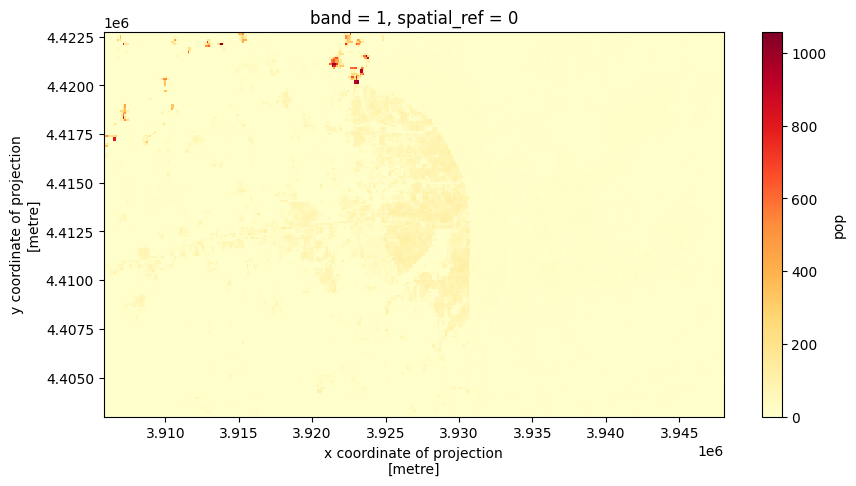

In [54]:
# POP DENSITY
adana.raster["pop"].tiff.pop.plot(cmap="YlOrRd", figsize=(10,5))

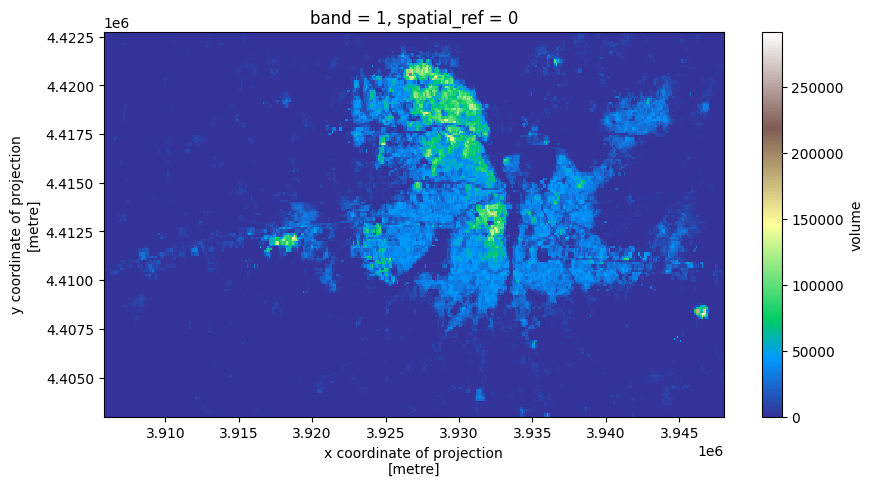

In [55]:
# VOLUME
adana.raster["volume"].tiff.volume.plot(cmap='terrain', figsize=(10,5))

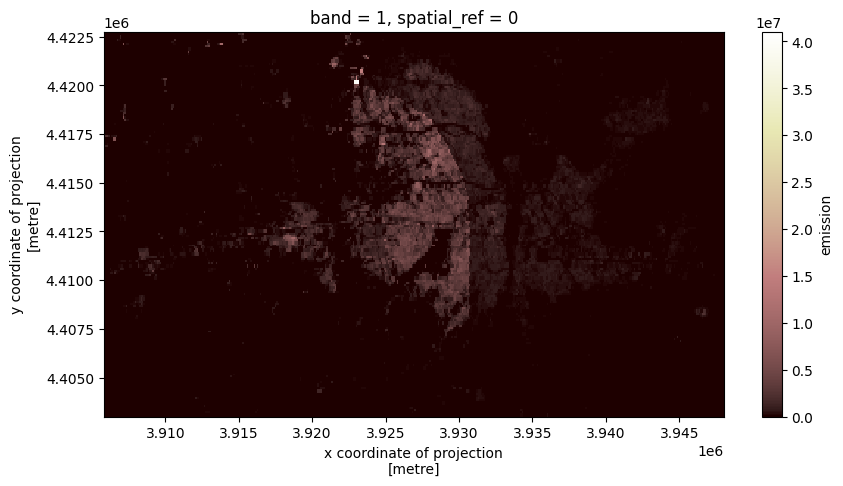

In [56]:
# Emission weights 
adana.output.emission.plot(cmap="pink",figsize=(10,5))

### CAIRO

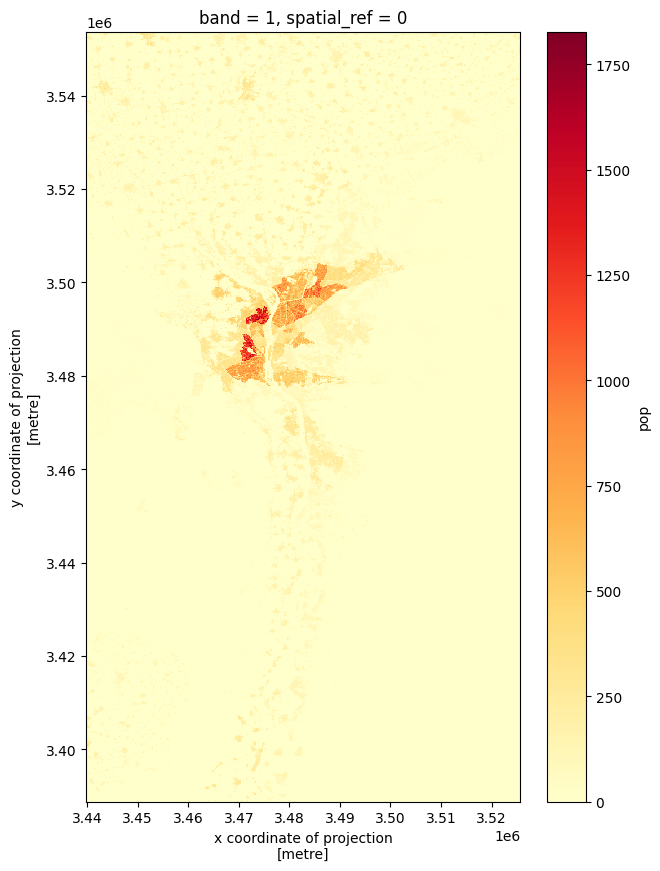

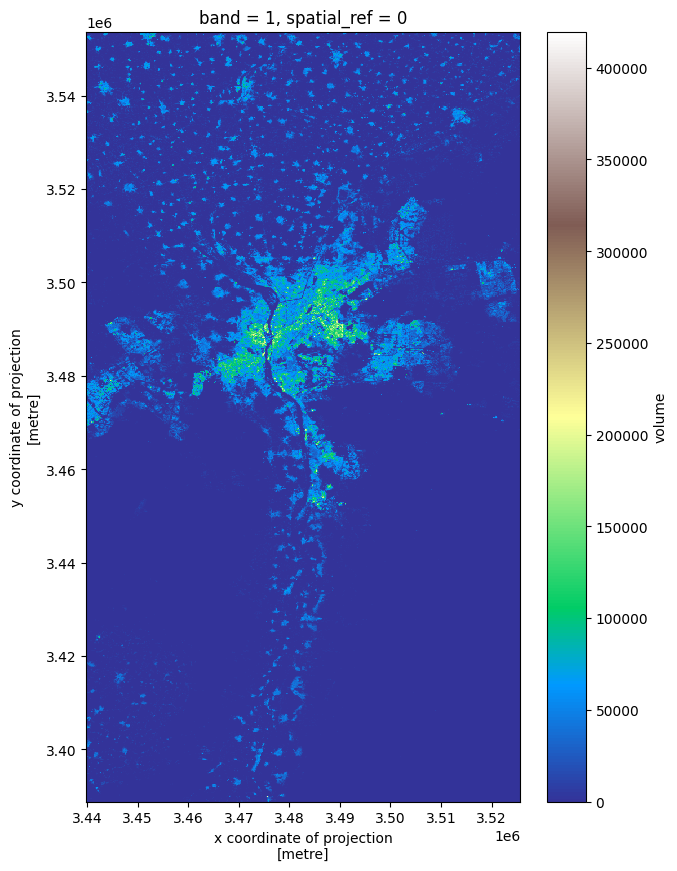

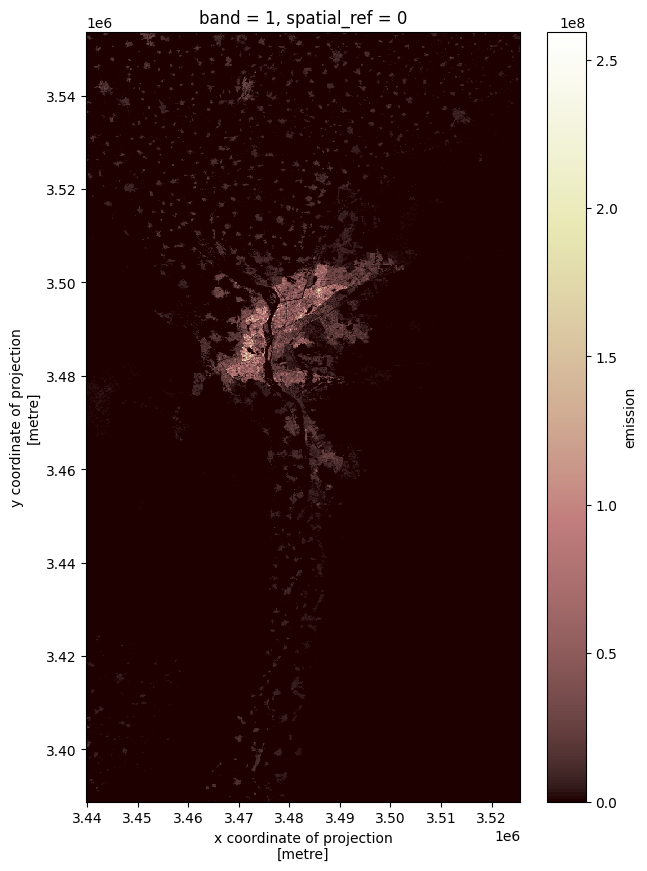

In [59]:
# POP DENSITY
cairo.raster["pop"].tiff.pop.plot(cmap="YlOrRd", figsize=(7,10))
# VOLUME
cairo.raster["volume"].tiff.volume.plot(cmap='terrain', figsize=(7,10))
# Emission weights 
cairo.output.emission.plot(cmap="pink",figsize=(7,10))

### JOHANNESBURG

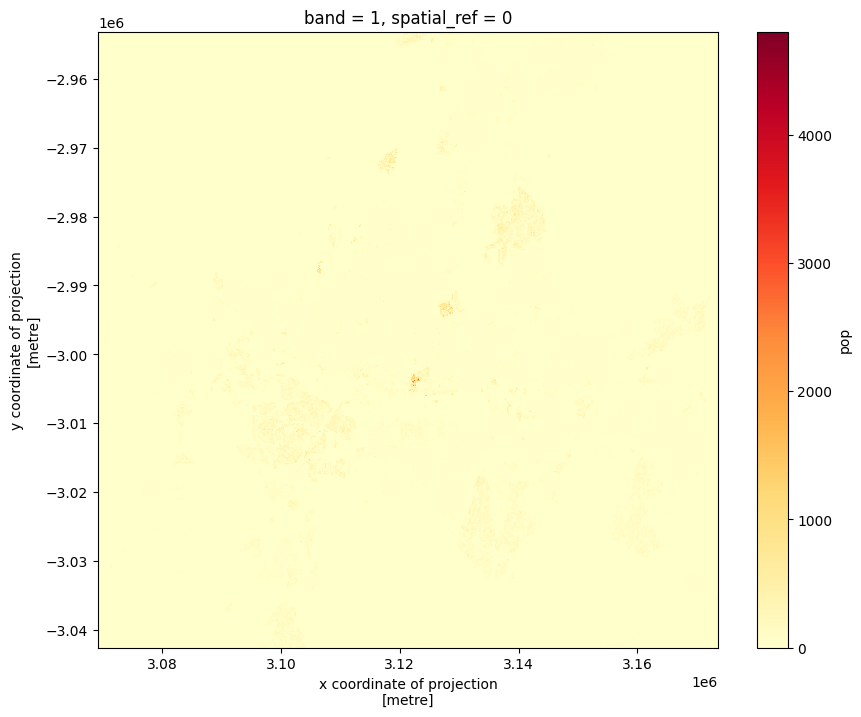

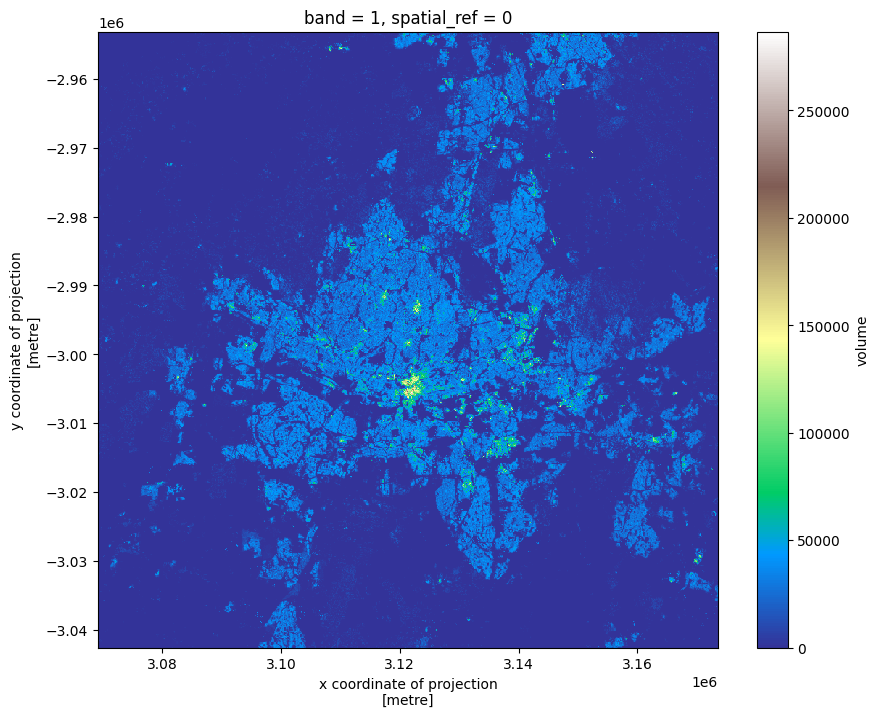

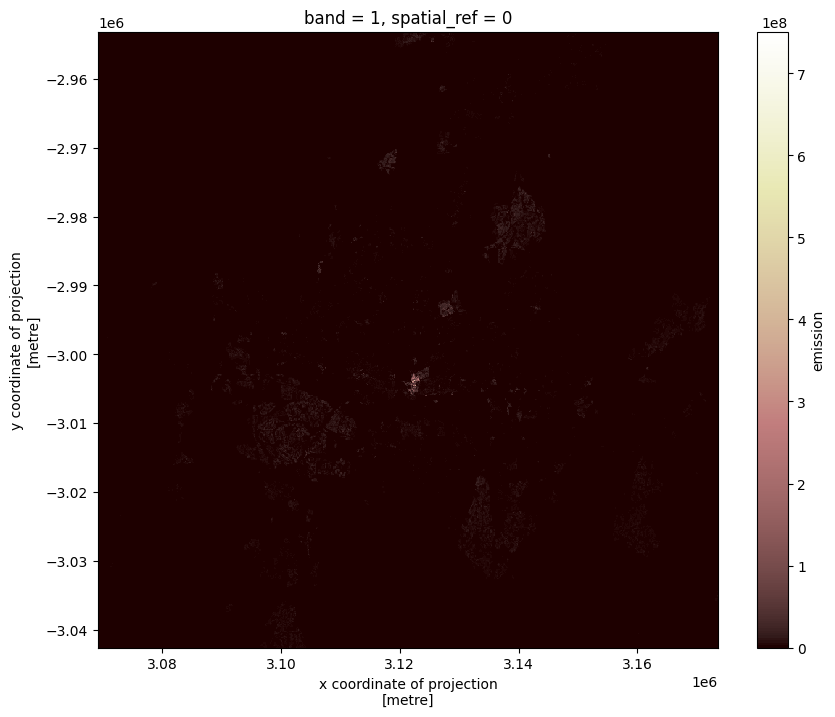

In [60]:
# POP DENSITY
johannesburg.raster["pop"].tiff.pop.plot(cmap="YlOrRd", figsize=(10,8))
# VOLUME
johannesburg.raster["volume"].tiff.volume.plot(cmap='terrain', figsize=(10,8))
# Emission weights 
johannesburg.output.emission.plot(cmap="pink",figsize=(10,8))

### DISPLAY TIFF RESULTS

In [65]:
# Write Results as TIF
result_path = os.path.join('data', 'results', '')
adana.output.emission.rio.to_raster(result_path+'adana.tif')
cairo.output.emission.rio.to_raster(result_path+'cairo.tif')
johannesburg.output.emission.rio.to_raster(result_path+'johannesburg.tif')

In [66]:
import xarray as xr
result_path = os.path.join('data', 'results', '')
city = 'adana'
result = xr.open_dataset(result_path+city+'.tif')

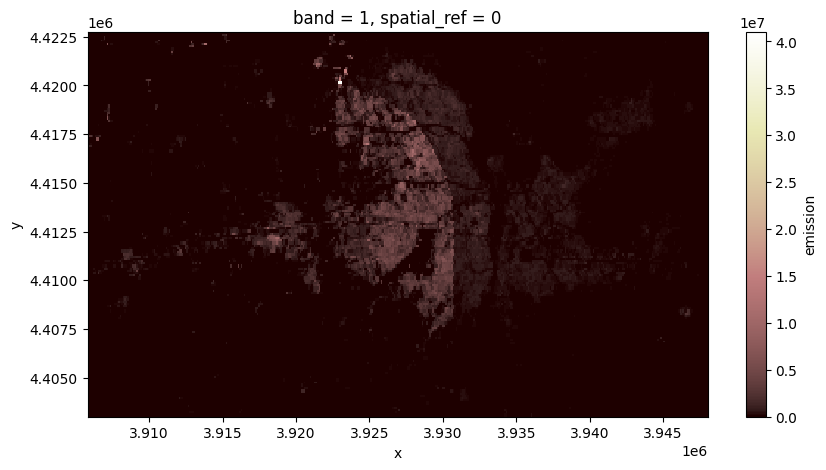

In [68]:
result.band_data.plot(cmap="pink", figsize=(10,5))

#### Some illustrative difference maps :
    - population vs building height
    - building density vs nighttime light

In [14]:
ordu.normalize_output()

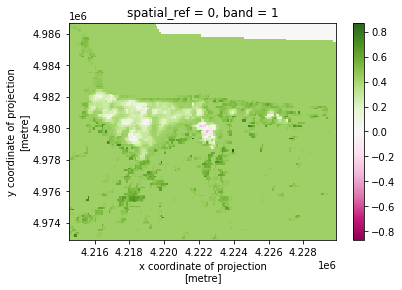

In [25]:
ordu.difference_map('pop', 'height')

**In White** : population density is correlated to building height  
**In Green** : population density is high despite lower building height  
**In Pink** : population is low despite high building height (working / industrial distric ?)

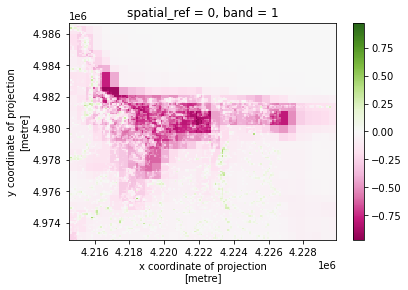

In [27]:
ordu.difference_map('density', 'ntl')

**In White** : Correlated  
**In Pink** : High NTL despite lower density (probably due to light diffusion + lower resolution)

In [6]:
file = os.path.join('data', 'clipped_house', 'Ordu.json')
df = geopandas.GeoDataFrame.from_file(file)

<AxesSubplot:>

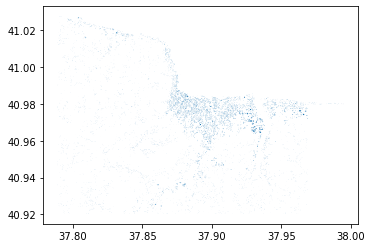

In [9]:
df[:10000].plot()